<a href="https://colab.research.google.com/github/Suresh18698/Diabetes_Prediction/blob/main/Diabetes_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem-Requirements:

1.Read the file and do exploratory analysis of the dataset, visulaise, share what you observe

2.Follow Datascience process steps to build ML model to predict diabetes

3.Report your accuracy metrics

4.Based on your model, Summarize factors influence diabetes prediction Use Python to build model

1) DATA CLEANING

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/diabetes (1).csv') # read the datasets

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# 1) delete duplicates
print (df. shape)
df=df.drop_duplicates()
df.shape

(768, 9)


(768, 9)

NO DUPLICATES ARE IN DATASETS

In [ ]:
# 2) CHECK THE DATA STRUCTURE
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


DATAS ARE STORE IN CORRECT FORMATE

In [ ]:
#3) TREATING NULL VALUES
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df=df.replace(0,np.NaN)

In [ ]:
df.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
fat                         123
belowparpregnency           734
dtype: int64

In [ ]:
def treat_null(df,column):
  df[column].fillna(df[column].mean(),inplace=True)
def treat_null_cat(df,column):
  df[column].fillna(df[column].median(),inplace=True)

In [ ]:
for i in ['Glucose','BloodPressure','Insulin']:
  treat_null(df,i)
for j in ['BMI','SkinThickness']:
  treat_null_cat(df,j)

In [ ]:
df['Pregnancies'].fillna(0,inplace=True)

NO NULL VALUES ARE IN DIABETES

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,fat,belowparpregnency
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,268.0,645.0,34.0
mean,3.845052,121.686763,72.405184,29.108073,155.548223,32.455208,0.471876,33.240885,1.0,1.0,1.0
std,3.369578,30.435949,12.096346,8.791221,85.021108,6.875177,0.331329,11.760232,0.0,0.0,0.0
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,1.0,1.0,1.0
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,1.0,1.0,1.0
50%,3.000000,117.000000,72.202592,29.000000,155.548223,32.300000,0.372500,29.000000,1.0,1.0,1.0
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.0,1.0,1.0
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.0,1.0,1.0


In [ ]:
df.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
fat                         123
belowparpregnency           734
dtype: int64

In [ ]:
df['Outcome'].fillna(0,inplace=True)

In [ ]:
#)4)TREATING OUTLIERS THIS IS MEDICAL FIELD DATAS OUTLIERS ARE IMPORTANT IN THIS DATASETS

2)FEATURE ENGINEERING

In [ ]:
def fat(df):
  if df>25:
    return 1
  else:
    return 0
df['fat']=[fat(i) for i in df['BMI']]
def excess_Glucose(df):
  if df>100:
    return 1
  else:
    return 0
df['excess_glocose']=[excess_Glucose(i) for i in df['Glucose']]
def lowBP(df):
  if df<80:
    return 1
  else:
    return 0
df['lowBp']=[lowBP(i) for i in df['BloodPressure']]

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,fat,belowparpregnency,excess_glocose,lowBp
0,6.0,148.0,72.0,35.0,155.548223,33.6,0.627,50,1.0,1,NaN,1,1
1,1.0,85.0,66.0,29.0,155.548223,26.6,0.351,31,0.0,1,NaN,0,1
2,8.0,183.0,64.0,29.0,155.548223,23.3,0.672,32,1.0,0,NaN,1,1
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21,0.0,1,NaN,0,1
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1.0,1,NaN,1,1


3)EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def EDA(df,num_features,cat_features,outcome):
  for i in num_features:
    plt.figure(figsize=(15,10))
    sns.histplot(x=i,data=df,hue=outcome,bins=10,kde=True,multiple='stack')
    plt.show()
  for j in cat_features:
    df.groupby(j)[outcome].mean().sort_values().plot(kind='barh')
    plt.show()

  plt.figure(figsize=(15, 10))
  sns.heatmap(df.corr(),cmap='RdBu_r',annot=True)
  plt.show()

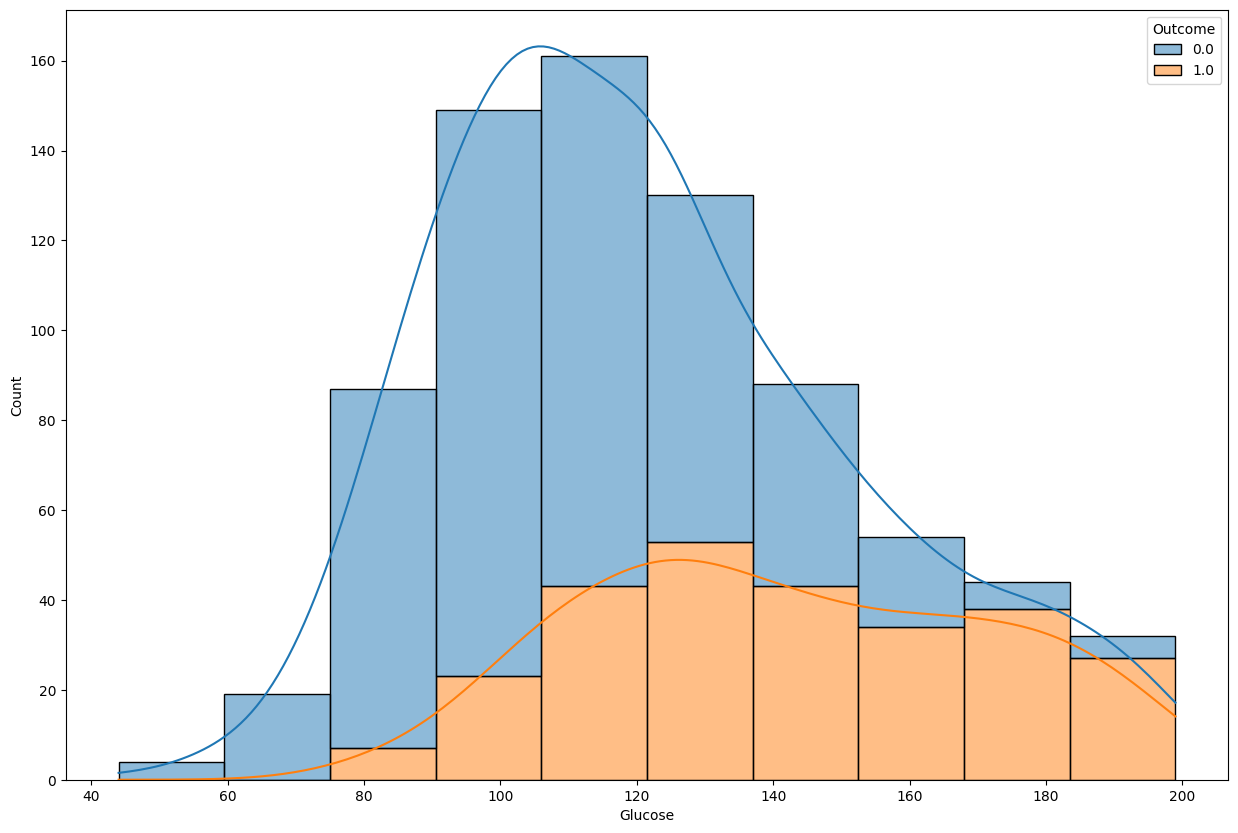

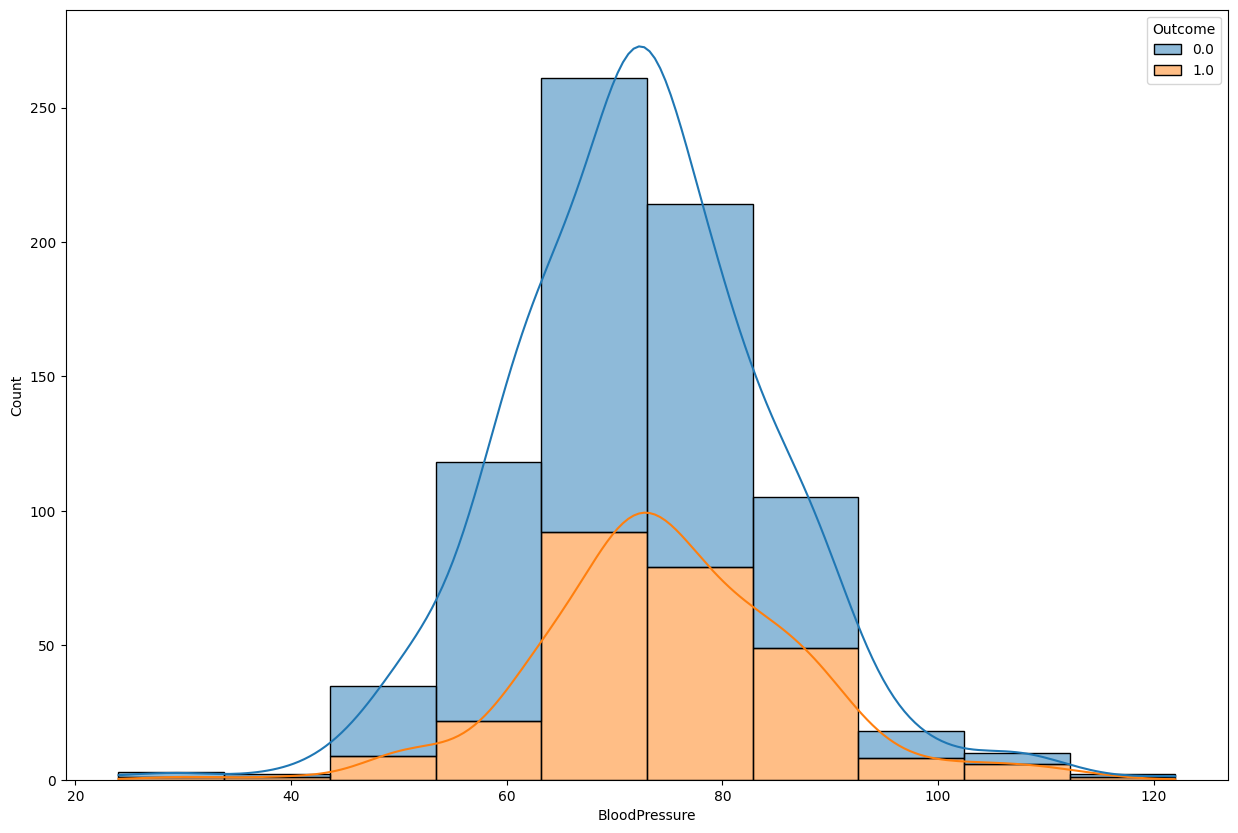

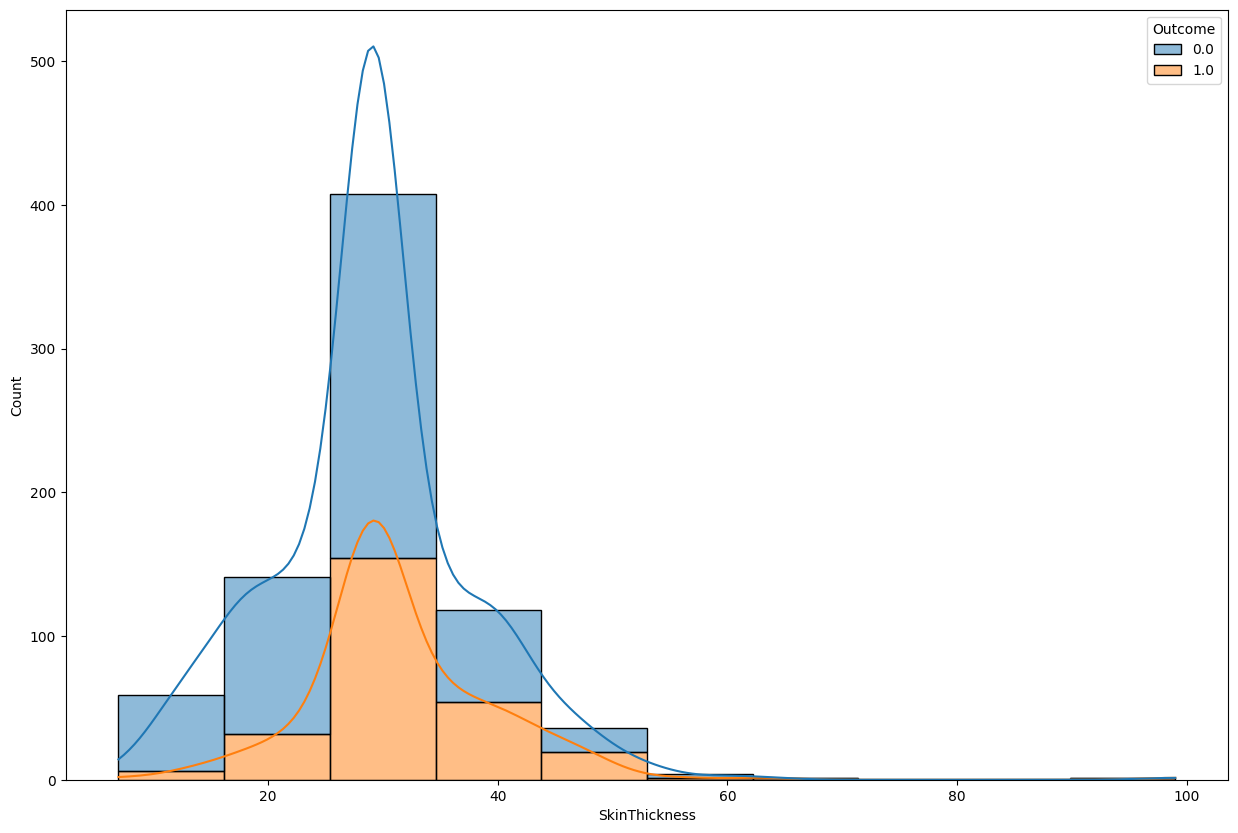

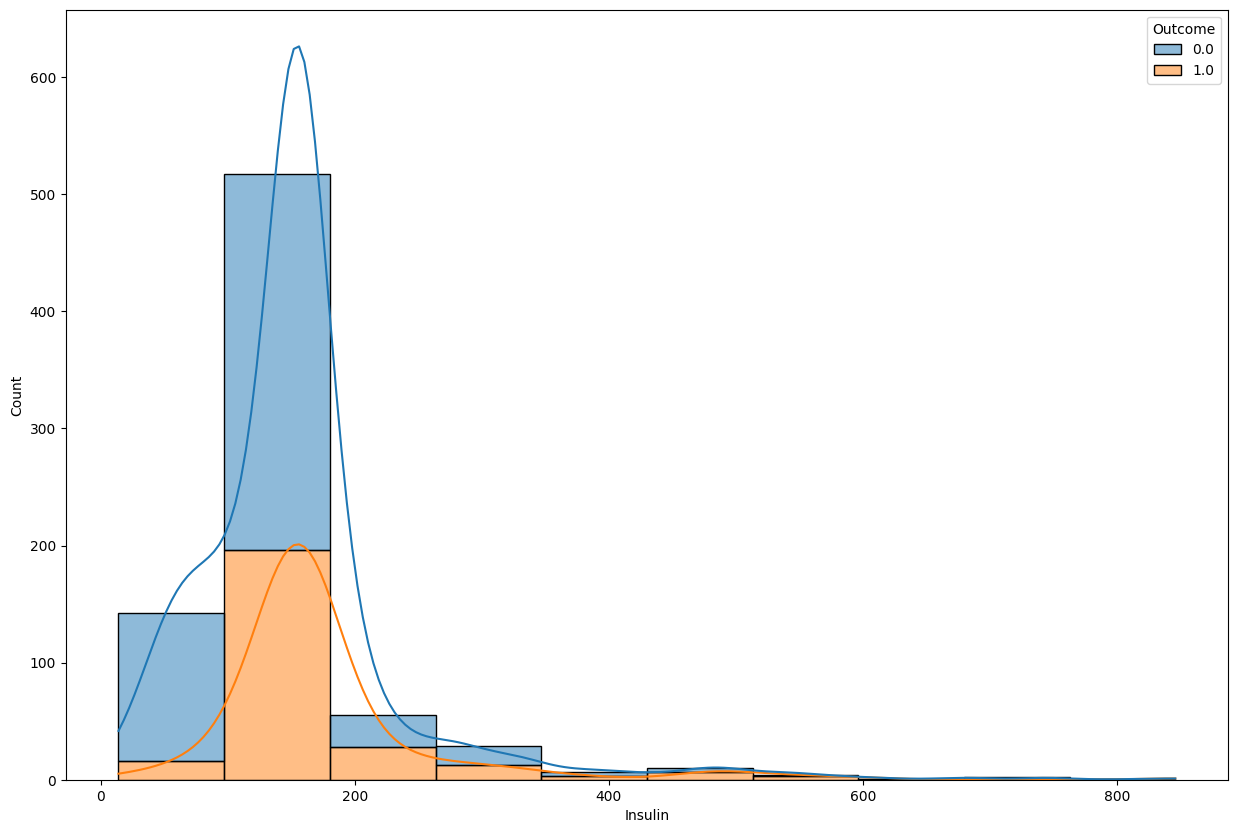

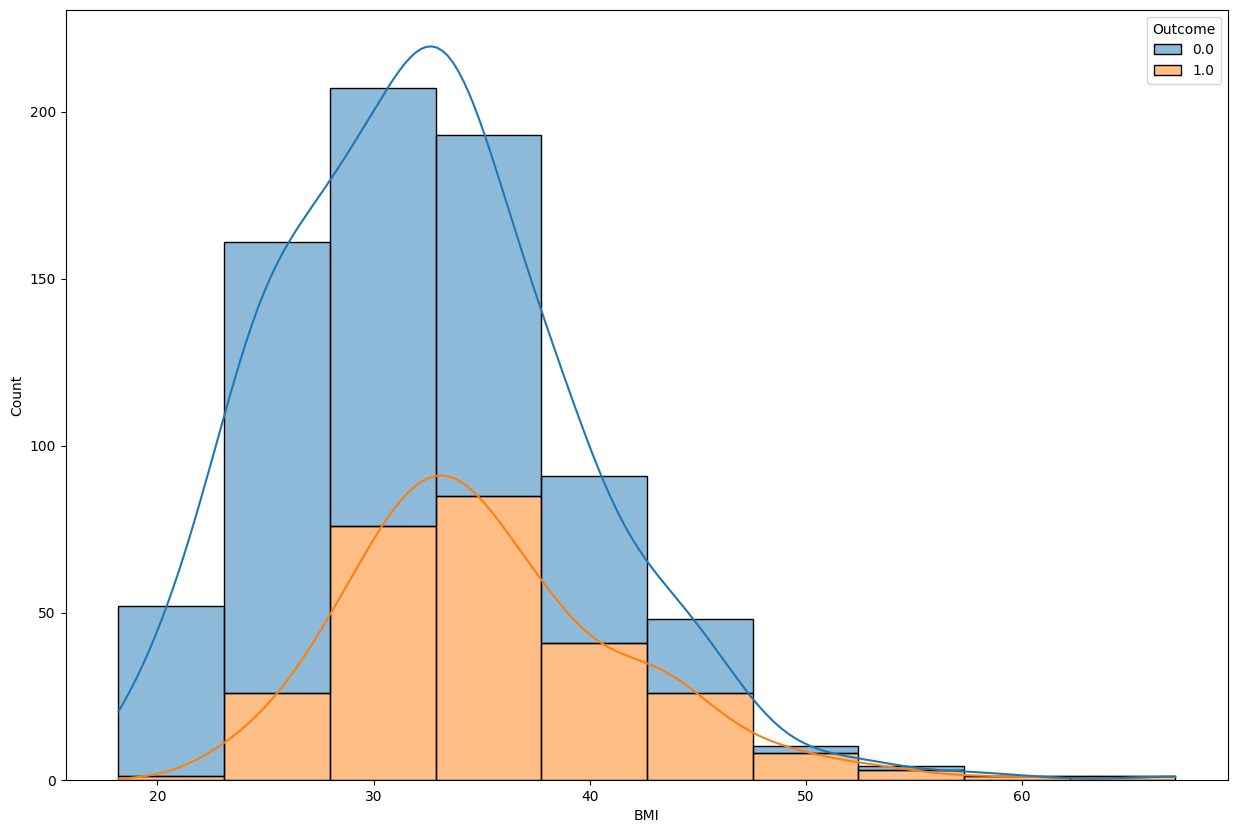

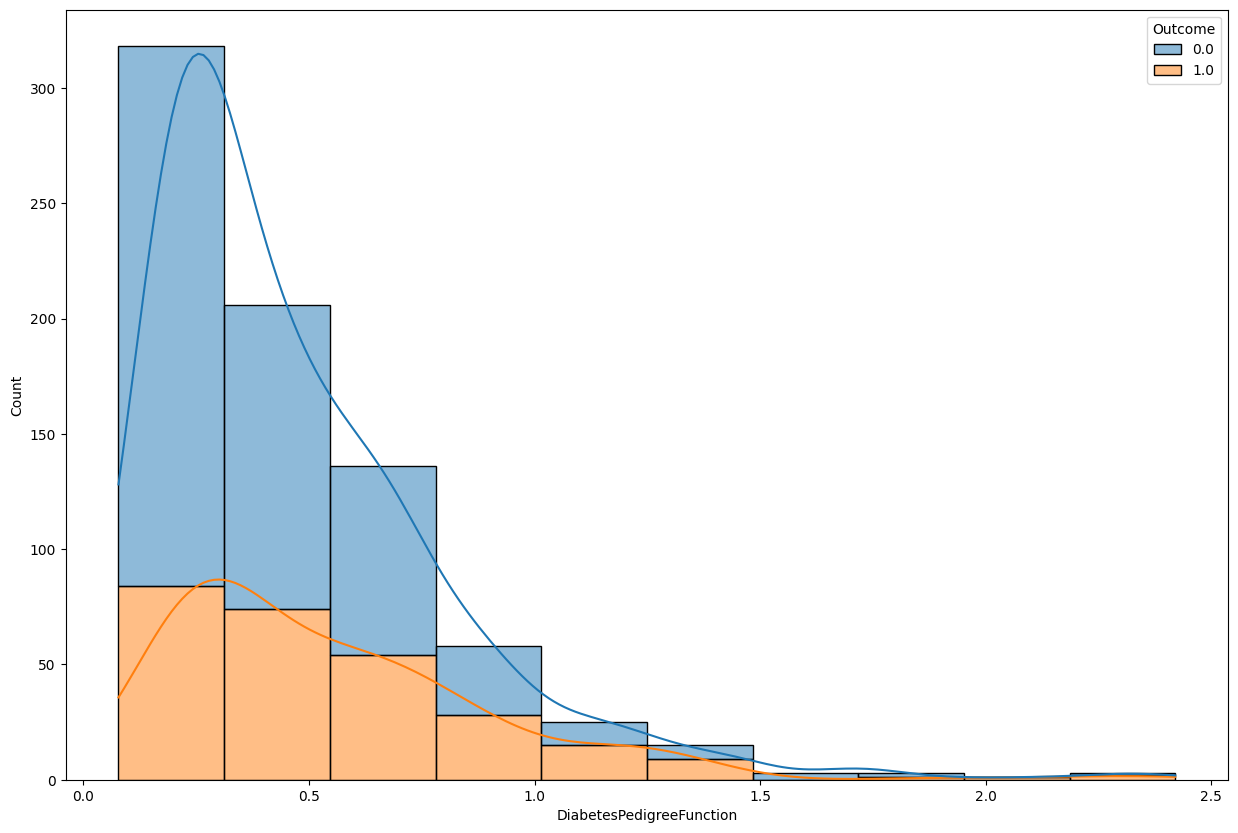

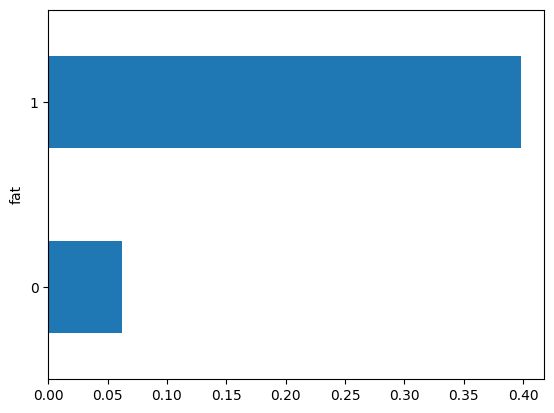

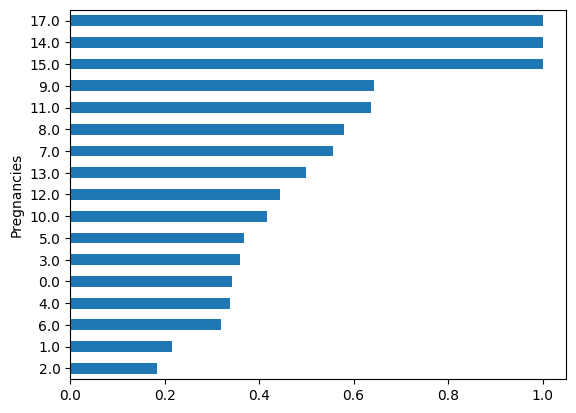

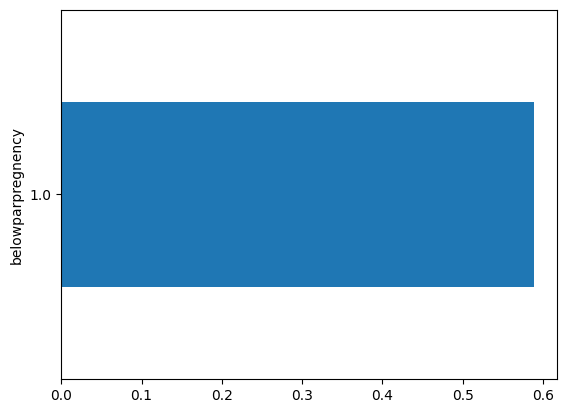

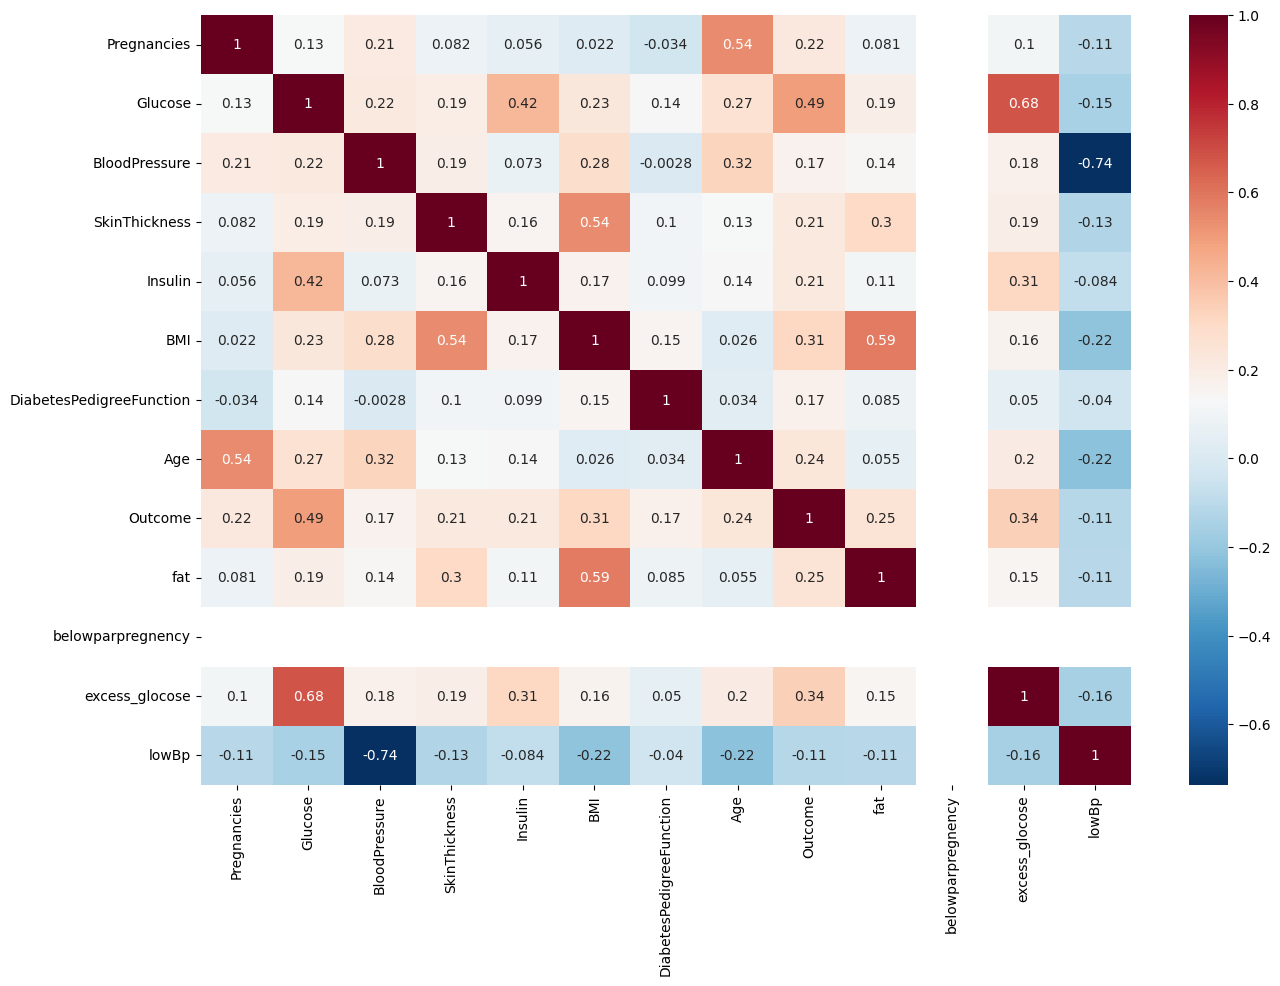

In [ ]:
num_features=["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction"]
cat_features=["fat","Pregnancies","belowparpregnency"]
EDA(df,num_features,cat_features,"Outcome")

4)CHECK BALANCING THE DATASETS

In [ ]:
def check(df,outcome):
  count_data=pd.DataFrame(df[outcome].value_counts()).reset_index()
  count_data.columns=[outcome,"count"]
  count_data["percentage"]=(count_data["count"]/sum(count_data["count"]))*100
  count_data.columns=[outcome,"count","percentage"]
  return count_data
check(df,"Outcome")

,Outcome,count,percentage
0,0,500,65.104167
1,1,268,34.895833


no need to balance the dataset . it already slightly balanced dataset

5)SPLITTING THE DATASET

In [ ]:
X=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15,stratify=y)

In [ ]:
X_train=X_train.values
X_test=X_test.values
y_train=y_train.values
y_test=y_test.values

In [ ]:
X_train.shape

(576, 10)

In [ ]:
y_train.shape

(576,)

6)SCALING OF DATA

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale = StandardScaler()
X_train_scale=scale.fit_transform(X_train)
X_test_scale=scale.transform(X_test)

7)BUILD THE MODEL

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score

In [ ]:
def MODEL (model,X_train, X_test, y_train, y_test,k):
  mod=model
  mod=mod.fit(X_train, y_train)
  y_predict_mod=mod.predict(X_test)
  y_pred_train=mod.predict(X_train)
  result= pd.DataFrame({'actual': y_test, 'predict': y_predict_mod})
  score=mod.score(X_test,y_test)
  print('for ' ,k ,' value ',"Train Accuracy : ",round(roc_auc_score(y_train,y_pred_train),3),"Val Accuracy : ", round(np.mean(cross_val_score(mod, X_train, y_train, cv=10,scoring='roc_auc')),3))
  return y_predict_mod,result,score,mod

In [ ]:
# LOGISTIC REGRESSION MODEL
from sklearn.linear_model import LogisticRegression
y_predict_log,result_L,score_L,log=MODEL(LogisticRegression(random_state=15),X_train_scale, X_test_scale, y_train, y_test,1)

for  1  value  Train Accuracy :  0.737 Val Accuracy :  0.833


In [ ]:
# KNN CLAASIFIER MODEL
from sklearn.neighbors import KNeighborsClassifier
for i in range (10,30,2):
  MODEL(KNeighborsClassifier(i),X_train_scale, X_test_scale, y_train, y_test,i)

for  10  value  Train Accuracy :  0.736 Val Accuracy :  0.79
for  12  value  Train Accuracy :  0.739 Val Accuracy :  0.795
for  14  value  Train Accuracy :  0.747 Val Accuracy :  0.795
for  16  value  Train Accuracy :  0.723 Val Accuracy :  0.801
for  18  value  Train Accuracy :  0.729 Val Accuracy :  0.804
for  20  value  Train Accuracy :  0.719 Val Accuracy :  0.803
for  22  value  Train Accuracy :  0.712 Val Accuracy :  0.803
for  24  value  Train Accuracy :  0.725 Val Accuracy :  0.806
for  26  value  Train Accuracy :  0.715 Val Accuracy :  0.808
for  28  value  Train Accuracy :  0.705 Val Accuracy :  0.809


In [ ]:
y_predict_knn,result_K,score_K,knn=MODEL(KNeighborsClassifier(28),X_train_scale, X_test_scale, y_train, y_test,28)

for  28  value  Train Accuracy :  0.705 Val Accuracy :  0.809


In [ ]:
# DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
for i in range(1,10):
  MODEL(DecisionTreeClassifier(max_depth=i,random_state=15),X_train_scale, X_test_scale, y_train, y_test,i)

for  1  value  Train Accuracy :  0.723 Val Accuracy :  0.709
for  2  value  Train Accuracy :  0.735 Val Accuracy :  0.778
for  3  value  Train Accuracy :  0.767 Val Accuracy :  0.796
for  4  value  Train Accuracy :  0.751 Val Accuracy :  0.795
for  5  value  Train Accuracy :  0.795 Val Accuracy :  0.777
for  6  value  Train Accuracy :  0.857 Val Accuracy :  0.745
for  7  value  Train Accuracy :  0.872 Val Accuracy :  0.722
for  8  value  Train Accuracy :  0.945 Val Accuracy :  0.718
for  9  value  Train Accuracy :  0.957 Val Accuracy :  0.692


In [ ]:
y_predict_dt,result_D,score_D,dt=MODEL(DecisionTreeClassifier(max_depth=3,random_state=15),X_train_scale, X_test_scale, y_train, y_test,3)

for  3  value  Train Accuracy :  0.767 Val Accuracy :  0.796


In [ ]:
# XGBOOST CLASSIFIER
import xgboost as xgb
for i in np.arange(0.1,1.1,0.1):
  MODEL(xgb.XGBClassifier(learning_rate=i,n_estimators= 100,random_state=15),X_train_scale, X_test_scale, y_train, y_test,i)

for  0.1  value  Train Accuracy :  0.995 Val Accuracy :  0.815
for  0.2  value  Train Accuracy :  1.0 Val Accuracy :  0.819
for  0.30000000000000004  value  Train Accuracy :  1.0 Val Accuracy :  0.801
for  0.4  value  Train Accuracy :  1.0 Val Accuracy :  0.794
for  0.5  value  Train Accuracy :  1.0 Val Accuracy :  0.788
for  0.6  value  Train Accuracy :  1.0 Val Accuracy :  0.801
for  0.7000000000000001  value  Train Accuracy :  1.0 Val Accuracy :  0.78
for  0.8  value  Train Accuracy :  1.0 Val Accuracy :  0.798
for  0.9  value  Train Accuracy :  1.0 Val Accuracy :  0.781
for  1.0  value  Train Accuracy :  1.0 Val Accuracy :  0.8


In [ ]:
for i in np.arange(0.15,0.25,0.01):
  MODEL(xgb.XGBClassifier(learning_rate=i,n_estimators= 100,random_state=15),X_train_scale, X_test_scale, y_train, y_test,i)

for  0.15  value  Train Accuracy :  1.0 Val Accuracy :  0.811
for  0.16  value  Train Accuracy :  1.0 Val Accuracy :  0.812
for  0.17  value  Train Accuracy :  1.0 Val Accuracy :  0.812
for  0.18000000000000002  value  Train Accuracy :  1.0 Val Accuracy :  0.818
for  0.19000000000000003  value  Train Accuracy :  1.0 Val Accuracy :  0.805
for  0.20000000000000004  value  Train Accuracy :  1.0 Val Accuracy :  0.819
for  0.21000000000000005  value  Train Accuracy :  1.0 Val Accuracy :  0.82
for  0.22000000000000006  value  Train Accuracy :  1.0 Val Accuracy :  0.798
for  0.23000000000000007  value  Train Accuracy :  1.0 Val Accuracy :  0.813
for  0.24000000000000007  value  Train Accuracy :  1.0 Val Accuracy :  0.805


In [ ]:
y_predict_Xgb,result_X,score_X,Xgb=MODEL(xgb.XGBClassifier(learning_rate=0.3,n_estimators= 100,random_state=37),X_train_scale, X_test_scale, y_train, y_test,0.3)

for  0.3  value  Train Accuracy :  1.0 Val Accuracy :  0.801


In [ ]:
# RANDOM FOREST CLAASIFIER
from sklearn.ensemble import RandomForestClassifier
for i in [5,10,20,30,40,50,60,70,80,90,100]:
  MODEL(RandomForestClassifier(max_depth=3,n_estimators=i,random_state=15,max_features='sqrt'),X_train_scale, X_test_scale, y_train, y_test,i)

for  5  value  Train Accuracy :  0.75 Val Accuracy :  0.805
for  10  value  Train Accuracy :  0.752 Val Accuracy :  0.822
for  20  value  Train Accuracy :  0.764 Val Accuracy :  0.828
for  30  value  Train Accuracy :  0.756 Val Accuracy :  0.833
for  40  value  Train Accuracy :  0.762 Val Accuracy :  0.831
for  50  value  Train Accuracy :  0.769 Val Accuracy :  0.833
for  60  value  Train Accuracy :  0.77 Val Accuracy :  0.832
for  70  value  Train Accuracy :  0.77 Val Accuracy :  0.831
for  80  value  Train Accuracy :  0.763 Val Accuracy :  0.832
for  90  value  Train Accuracy :  0.76 Val Accuracy :  0.832
for  100  value  Train Accuracy :  0.756 Val Accuracy :  0.834


In [ ]:
y_predict_rfc,result_R,score_R,rfc=MODEL(RandomForestClassifier(max_depth=3,n_estimators=70,random_state=15,max_features='sqrt'),X_train_scale, X_test_scale, y_train, y_test,70)

for  70  value  Train Accuracy :  0.77 Val Accuracy :  0.831


8)EVALUATION METRICS

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,roc_auc_score,roc_curve,RocCurveDisplay

In [ ]:
def evaluate(mod,X_test,y_test,y_predict):
  f1=f1_score(y_test,y_predict)
  roc=roc_auc_score(y_test,y_predict)
  #fpr,tpr,_=roc_curve(y_test,y_predict)
  #plt.plot(fpr,tpr)
  #a=RocCurveDisplay.from_predictions(fpr=fpr,tpr=tpr)
  #a.plot()
  #plt.show()
  print('AUROC  score of ',mod,': ', roc)
  print('F1 score of ',mod, ':',f1)

In [ ]:
evaluate(log,X_test,y_test,y_predict_log)

AUROC  score of  LogisticRegression(random_state=15) :  0.7121194029850747
F1 score of  LogisticRegression(random_state=15) : 0.6166666666666666


In [ ]:
evaluate(knn,X_test,y_test,y_predict_knn)

AUROC  score of  KNeighborsClassifier(n_neighbors=28) :  0.6569552238805969
F1 score of  KNeighborsClassifier(n_neighbors=28) : 0.5185185185185185


In [ ]:
evaluate(dt,X_test,y_test,y_predict_dt)

AUROC  score of  DecisionTreeClassifier(max_depth=3, random_state=15) :  0.6961194029850747
F1 score of  DecisionTreeClassifier(max_depth=3, random_state=15) : 0.5967741935483871


In [ ]:
evaluate(xgb,X_test,y_test,y_predict_Xgb)

AUROC  score of  <module 'xgboost' from '/usr/local/lib/python3.10/dist-packages/xgboost/__init__.py'> :  0.707044776119403
F1 score of  <module 'xgboost' from '/usr/local/lib/python3.10/dist-packages/xgboost/__init__.py'> : 0.6141732283464567


In [ ]:
evaluate(rfc,X_test,y_test,y_predict_rfc)

AUROC  score of  RandomForestClassifier(max_depth=3, n_estimators=70, random_state=15) :  0.7022686567164178
F1 score of  RandomForestClassifier(max_depth=3, n_estimators=70, random_state=15) : 0.5945945945945946


conclusion

1) Random forest classifier model gives high logisticregression score compared to other models.

2) according to heat map diabetes is highly depends on glucose level.

3)age and BMI are affect to result next to glucose.

4) skin thickness are not depends very much on daibetes.

5) diabetes mostly affected in between the age group of 40 to 60.